In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
sys.path.append("../scripts/")
import warnings
import numpy as np
import eval_metrics as evaluation
import load_data as data_load
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')

In [3]:
path_to_csv = '../dataset/dataset.csv'
test_size = 0.3
random_seed = 1

In [4]:
X_train, X_test, y_train, y_test, sens_train, sens_test= data_load.load_preprocessing_split(path_to_csv, split_data = True, awareness= True,
                                                                                         test_size=test_size, random_state=random_seed)
                                                                                        

### Logistic Regression Model

In [5]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [6]:
mymask= sens_test.Gender
LR_dp, LR_Eo, LR_fpr, LR_acc, LR_recall = evaluation.model_metrics(logistic_model, X_test, y_test, mask=mymask,  fair_metrics= True)
maleLR_dp, maleLR_Eo, maleLR_fpr, maleLR_acc, maleLR_recall = evaluation.model_metrics(logistic_model, X_test, y_test, mask=1-mymask,  fair_metrics= True)

### Random Forest Classifier

In [7]:
rf_classfier = RandomForestClassifier()
rf_classfier.fit(X_train,y_train)

RandomForestClassifier()

In [8]:
RF_dp, RF_Eo, RF_fpr, RF_acc, RF_recall= evaluation.model_metrics(rf_classfier, X_test, y_test, mask=mymask,  fair_metrics= True)
maleRF_dp, maleRF_Eo, maleRF_fpr, maleRF_acc, maleRF_recall= evaluation.model_metrics(rf_classfier, X_test, y_test, mask=1-mymask,  fair_metrics= True)

### DECISION TREE CLASSIFIER

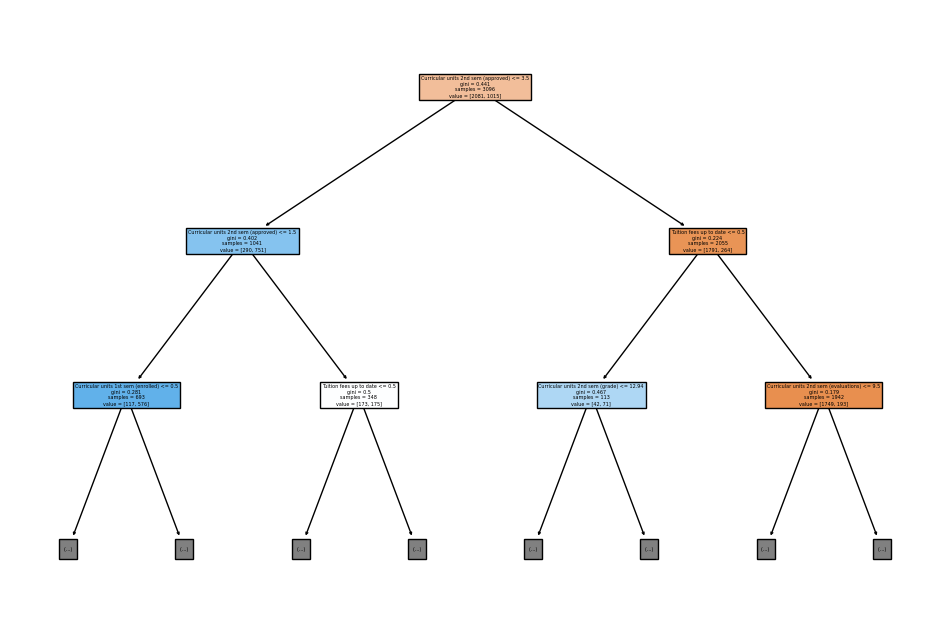

In [9]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
clf_preds = clf.predict(X_test)
clf_dp, clf_Eo, clf_fpr, clf_acc, clf_recall = evaluation.model_metrics(clf, X_test, y_test, mask=mymask,  fair_metrics= True)
maleclf_dp, maleclf_Eo, malelf_fpr, maleclf_acc, maleclf_recall = evaluation.model_metrics(clf, X_test, y_test, mask=1-mymask,  fair_metrics= True)

feature_names= X_test.columns.to_list()
plt.figure(figsize=(12, 8))
plot_tree(clf,max_depth = 2, filled=True, feature_names=feature_names)
plt.show()

In [10]:

# Define a dictionary for males
malemodels_eval = {
    "Metrics": ["Demographic Parity", "EO", "FPR", "Accuracy", "Recall"],
    "Linear Regression": [maleLR_dp, maleLR_Eo, maleLR_fpr, maleLR_acc, maleLR_recall],
    "Random Forest": [maleRF_dp, maleRF_Eo, maleRF_fpr, maleRF_acc, maleRF_recall],
    "Decision Tree": [maleclf_dp, maleclf_Eo, malelf_fpr, maleclf_acc, maleclf_recall]
}

# Convert the dictionary to a pandas DataFrame
male_eval_df = pd.DataFrame(malemodels_eval)

# Display the DataFrame
male_eval_df

,Metrics,Linear Regression,Random Forest,Decision Tree
0,Demographic Parity,0.188275,0.186020,0.235626
1,EO,0.721393,0.706468,0.676617
2,FPR,0.032070,0.033528,0.106414
3,Accuracy,0.912063,0.907554,0.844419
4,Recall,0.721393,0.706468,0.676617


In [11]:

# Define a dictionary for females
femalemodels_eval = {
    "Metrics": ["Demographic Parity", "EO", "FPR", "Accuracy", "Recall"],
    "Linear Regression": [LR_dp, LR_Eo, LR_fpr, LR_acc, LR_recall],
    "Random Forest": [RF_dp, RF_Eo, RF_fpr, RF_acc, RF_recall],
    "Decision Tree": [clf_dp, clf_Eo, clf_fpr, clf_acc, clf_recall]
}

# Convert the dictionary to a pandas DataFrame
female_eval_df = pd.DataFrame(femalemodels_eval)

# Display the DataFrame
female_eval_df

,Metrics,Linear Regression,Random Forest,Decision Tree
0,Demographic Parity,0.390023,0.390023,0.462585
1,EO,0.731707,0.721951,0.736585
2,FPR,0.093220,0.101695,0.224576
3,Accuracy,0.825397,0.816327,0.757370
4,Recall,0.731707,0.721951,0.736585


In [12]:

# Define a dictionary for difference
models_eval = {
    "Metrics": ["Demographic Parity", "EO", "FPR", "Accuracy", "Recall"],
    "Linear Regression": [LR_dp-maleLR_dp, LR_Eo-maleLR_Eo, LR_fpr-maleLR_fpr, LR_acc-maleLR_acc, LR_recall-maleLR_recall],
    "Random Forest": [RF_dp-maleRF_dp, RF_Eo-maleRF_Eo, RF_fpr-maleRF_fpr, RF_acc-maleRF_acc, RF_recall-maleRF_recall],
    "Decision Tree": [clf_dp-maleclf_dp, clf_Eo-maleclf_Eo, clf_fpr-malelf_fpr, clf_acc-maleclf_acc, clf_recall-maleclf_recall]
}

# Convert the dictionary to a pandas DataFrame
eval_df = pd.DataFrame(models_eval)

# Display the DataFrame
eval_df

,Metrics,Linear Regression,Random Forest,Decision Tree
0,Demographic Parity,0.201748,0.204002,0.226959
1,EO,0.010314,0.015484,0.059968
2,FPR,0.061150,0.068167,0.118162
3,Accuracy,-0.086666,-0.091227,-0.087050
4,Recall,0.010314,0.015484,0.059968
